## Empirical Assessment of Technical Analysis: High-frequency Data

In [ ]:
pip install ta

### 1. Introduction, Data Availability:

Intraday 1-minute data for the major stocks can be obtained for free in .csv format here: https://firstratedata.com/free-intraday-data. These will probably serve as our initial source. Using data for AAPL we will try to sketch our first technical analysis algorithm.

In [29]:
import pandas as pd
import mplfinance as fplt
import plotly.graph_objects as go
from ta.utils import dropna
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import math

In [30]:
df = pd.read_csv("AAPL_1min_firstratedata.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

#selecting a random day
day_df_1 = df[df['Date'].dt.date == pd.to_datetime("2022-10-19").date()].set_index("Date")
day_df_1

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-19 04:00:00,144.06,144.15,143.40,143.47,5842
2022-10-19 04:01:00,143.41,143.41,143.22,143.27,2488
2022-10-19 04:02:00,143.42,143.50,143.26,143.28,2645
2022-10-19 04:04:00,143.35,143.36,143.31,143.35,1191
2022-10-19 04:05:00,143.29,143.30,143.26,143.30,655
...,...,...,...,...,...
2022-10-19 19:55:00,143.00,143.00,143.00,143.00,450
2022-10-19 19:56:00,143.00,143.00,143.00,143.00,1055
2022-10-19 19:57:00,143.00,143.00,142.95,142.96,2540


In [31]:
candlestick = go.Candlestick(x = day_df_1.index, open = day_df['Open'], high = day_df['High'], low = day_df['Low'], close = day_df['Close'])
fig = go.Figure(data=[candlestick])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

### 2. Patterns & Indicators

#### Bollinger Bands

The Bollinger Bands are used to analyze the volatility of the price for an asset in a specific period of time. There are 3 bands, the Middle Band (MB) is the average of the price in the last n periods, the Upper (UB) and Lower Bands (LB) are equal to the middle band, but adding and subtracting x times the standard deviation. The normal parameters that are being used are n = 20 periods and x = 2.5.

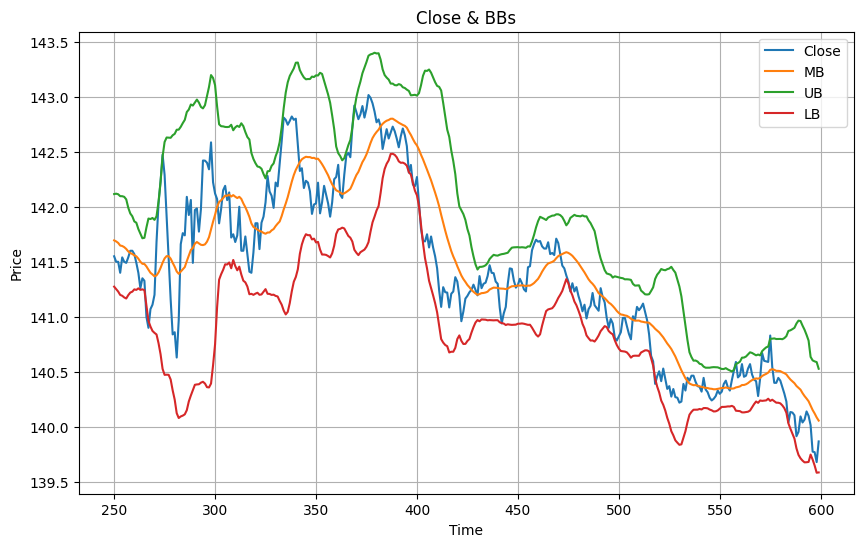

In [50]:
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2.5)

df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbu'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

plot_df = df.iloc[250:600]

plt.figure(figsize=(10, 6))
plt.plot(plot_df['Close'], label='Close')
plt.plot(plot_df['bb_bbm'], label='MB')
plt.plot(plot_df['bb_bbu'], label='UB')
plt.plot(plot_df['bb_bbl'], label='LB')
plt.title('Close & BBs')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### 3. Backtesting

In [51]:
def backtest(data, investment, method):
    
    in_position = False
    equity = investment
    
    if method == "BB":

        for i in range(30, len(data)):
            if data['bb_bbl'][i] > data['Close'][i] and in_position == False:
                no_of_shares = math.floor(equity/data.Close[i])
                equity -= (no_of_shares * data.Close[i])
                in_position = True
                print('BUY: 'f'{no_of_shares} Shares are bought at ${data.Close[i]} on {str(data.Date[i])}')
        
            elif data['bb_bbu'][i] < data['Close'][i] and in_position == True:
                equity += (no_of_shares * df.Close[i])
                in_position = False
                print('SELL: ' f'{no_of_shares} Shares are sold at ${data.Close[i]} on {str(data.Date[i])}')
    
        if in_position == True:
            equity += (no_of_shares * data.Close[i])
            print('Closing position at ' f'{data.Close[i]}' ' on ' f'{str(data.Date[i])}')
            in_position = False

    # if method ...
    
    # if method ...

    earning = round(equity - investment, 2)
    print('EARNING: ' f'{earning}')
    
backtest(df, 10000, "BB")


BUY: 69 Shares are bought at $143.06 on 2022-09-30 05:19:00
SELL: 69 Shares are sold at $142.2196 on 2022-09-30 08:02:00
BUY: 70 Shares are bought at $141.14 on 2022-09-30 08:30:00
SELL: 70 Shares are sold at $142.4735 on 2022-09-30 09:33:00
BUY: 70 Shares are bought at $142.31 on 2022-09-30 11:35:00
SELL: 70 Shares are sold at $140.59 on 2022-09-30 14:17:00
BUY: 71 Shares are bought at $139.24 on 2022-09-30 15:50:00
SELL: 71 Shares are sold at $137.67 on 2022-09-30 18:28:00
BUY: 71 Shares are bought at $137.5 on 2022-09-30 19:15:00
SELL: 71 Shares are sold at $137.64 on 2022-10-03 06:25:00
BUY: 70 Shares are bought at $138.46 on 2022-10-03 09:21:00
SELL: 70 Shares are sold at $141.45 on 2022-10-03 10:45:00
BUY: 70 Shares are bought at $142.6299 on 2022-10-03 15:16:00
SELL: 70 Shares are sold at $142.65 on 2022-10-03 19:01:00
BUY: 70 Shares are bought at $142.79 on 2022-10-03 19:55:00
SELL: 70 Shares are sold at $144.71 on 2022-10-04 04:00:00
BUY: 70 Shares are bought at $145.09 on 202

###  Coming soon: Short positions, more patterns & indicators, ...